In [1]:
import json
import os

In [2]:
import tables_utilities as tables_utl
import importlib
importlib.reload(tables_utl)
file_dir="../experiments/results_fullyconnected/"

In [3]:
experiments=[["Paulis"], ["benzene"], ["max_cut"], ["labs"]]
quclear_tag="quclear"
quclear_tag2="our"
quclear_tag3="combined"
quclear_res=[[tables_utl.get_results(file_dir, quclear_tag, exper) for exper in block] for block in experiments]
print(quclear_res)

[[{'test_quclear_Paulis320.json': {'num_paulis': 320, 'times': {'our_time': 2.290482997894287, 'combined_time': 2.726691246032715, 'qiskit_time': 2.718395948410034, 'rustiq_time': 0.11527895927429199}, 'gate_counts': {'our_method': 507, 'combined_method': 448, 'qiskit_method': 1003, 'rustiq_method': 794}, 'circuit_entangling_depth': {'our_method': 385, 'combined_method': 335, 'qiskit_method': 990, 'rustiq_method': 664}, 'test_paulis_file': 'experiments/results_fullyconnected/test_uccsd_paulis_e4_o8.json', 'num_qubits': 8}, 'test_quclear_Paulis5376.json': {'num_paulis': 5376, 'times': {'our_time': 85.3802137374878, 'combined_time': 111.06760120391846, 'qiskit_time': 95.37274074554443, 'rustiq_time': 4177.472219944}, 'gate_counts': {'our_method': 9832, 'combined_method': 8820, 'qiskit_method': 23498, 'rustiq_method': 18552}, 'circuit_entangling_depth': {'our_method': 6941, 'combined_method': 6153, 'qiskit_method': 23020, 'rustiq_method': 13084}, 'test_paulis_file': 'experiments/results_f

In [4]:
quclear_uccsd=tables_utl.get_metrics(quclear_res[0][0], quclear_tag3)
quclear_benzene=tables_utl.get_metrics(quclear_res[1][0], quclear_tag3)
quclear_max_cut=tables_utl.get_metrics(quclear_res[2][0], quclear_tag3)
quclear_labs=tables_utl.get_metrics(quclear_res[3][0], quclear_tag3)


tables_utl.test_lenghts_res(quclear_res)

print(quclear_uccsd.keys())

True
dict_keys(['test_quclear_Paulis320.json', 'test_quclear_Paulis5376.json', 'test_quclear_Paulis1656.json', 'test_quclear_Paulis24.json', 'test_quclear_Paulis13400.json', 'test_quclear_Paulis80.json'])


In [5]:
quclear_only_uccsd=tables_utl.get_metrics(quclear_res[0][0], quclear_tag2)
quclear_only_benzene=tables_utl.get_metrics(quclear_res[1][0], quclear_tag2)
quclear_only_max_cut=tables_utl.get_metrics(quclear_res[2][0], quclear_tag2)
quclear_only_labs=tables_utl.get_metrics(quclear_res[3][0], quclear_tag2)
print(quclear_only_benzene.keys())


dict_keys(['test_quclear_benzene.json'])


In [6]:
quclear_only_benzene

{'test_quclear_benzene.json': {'num_paulis': 1254,
  'times': 13.2809,
  'cnots': 2479,
  'circuit_entangling_depth': 1486,
  'num_qubits': 12}}

The results for Figure 9 are stored in results dictionary

In [7]:

results = {}

# Function to update results dictionary
def update_results(experiments, quclear_only_data, combined_data, dataset_name):
    for experiment in experiments:
        quclear_only_gate_count = quclear_only_data[experiment]['cnots']
        combined_gate_count = combined_data[experiment]['cnots']
        results[experiment] = {
            "dataset": dataset_name,
            "ours": quclear_only_gate_count,
            "combined": combined_gate_count
        }

# Update results for each experiment group
update_results(
    ['test_quclear_Paulis1656.json', 'test_quclear_Paulis5376.json', 'test_quclear_Paulis13400.json'],
    quclear_only_uccsd, quclear_uccsd, "Paulis"
)

update_results(
    ['test_quclear_benzene.json'],
    quclear_only_benzene, quclear_benzene, "Benzene"
)

update_results(
    ["test_quclear_labs_n20_layers1.json"],
    quclear_only_labs, quclear_labs, "Labs"
)

update_results(
    ["test_quclear_max_cut_benchmark_regular_n20_e12_l1.json", "test_quclear_max_cut_benchmark_connected_n20_e117_l1.json"],
    quclear_only_max_cut, quclear_max_cut, "Max Cut"
)

# Print the results in a readable format
print("Experiment Results:")
for experiment, data in results.items():
    print(f"\nExperiment: {experiment}")
    print(f"  Dataset: {data['dataset']}")
    print(f"  QuCLEAR Gate Count: {data['combined']}")
    print(f"  QuCLEAR without Qiskit O3 Gate Count: {data['ours']}")

Experiment Results:

Experiment: test_quclear_Paulis1656.json
  Dataset: Paulis
  QuCLEAR Gate Count: 2580
  QuCLEAR without Qiskit O3 Gate Count: 2863

Experiment: test_quclear_Paulis5376.json
  Dataset: Paulis
  QuCLEAR Gate Count: 8820
  QuCLEAR without Qiskit O3 Gate Count: 9832

Experiment: test_quclear_Paulis13400.json
  Dataset: Paulis
  QuCLEAR Gate Count: 24022
  QuCLEAR without Qiskit O3 Gate Count: 26704

Experiment: test_quclear_benzene.json
  Dataset: Benzene
  QuCLEAR Gate Count: 2470
  QuCLEAR without Qiskit O3 Gate Count: 2479

Experiment: test_quclear_labs_n20_layers1.json
  Dataset: Labs
  QuCLEAR Gate Count: 1052
  QuCLEAR without Qiskit O3 Gate Count: 1052

Experiment: test_quclear_max_cut_benchmark_regular_n20_e12_l1.json
  Dataset: Max Cut
  QuCLEAR Gate Count: 171
  QuCLEAR without Qiskit O3 Gate Count: 171

Experiment: test_quclear_max_cut_benchmark_connected_n20_e117_l1.json
  Dataset: Max Cut
  QuCLEAR Gate Count: 148
  QuCLEAR without Qiskit O3 Gate Count: 14

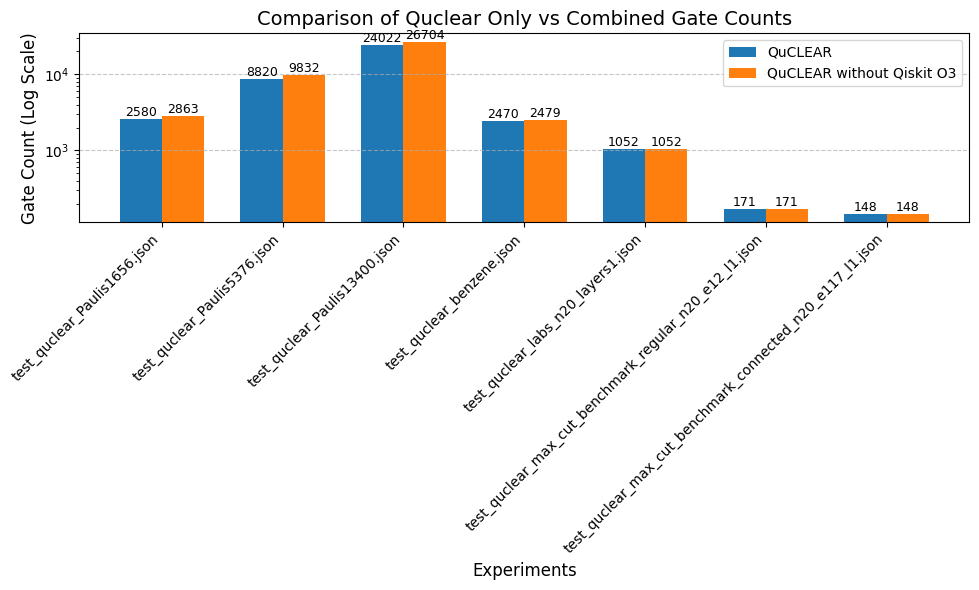

In [8]:
import matplotlib.pyplot as plt


# Prepare data for the bar chart
experiments = list(results.keys())
ours_counts = [results[exp]["ours"] for exp in experiments]
combined_counts = [results[exp]["combined"] for exp in experiments]

# Create the bar chart
x = range(len(experiments))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars_combined = ax.bar(x, combined_counts, width=bar_width, label="QuCLEAR", align='center')
bars_ours = ax.bar([i + bar_width for i in x], ours_counts, width=bar_width, label="QuCLEAR without Qiskit O3", align='center')

# Add data labels
for bar in bars_ours:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height, f"{height}",
        ha='center', va='bottom', fontsize=9
    )
for bar in bars_combined:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height, f"{height}",
        ha='center', va='bottom', fontsize=9
    )

# Customize the chart
ax.set_yscale('log')  # Set y-axis to log scale
ax.set_xlabel("Experiments", fontsize=12)
ax.set_ylabel("Gate Count (Log Scale)", fontsize=12)
ax.set_title("Comparison of Quclear Only vs Combined Gate Counts", fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(experiments, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("figure9.pdf", format="pdf", dpi=300)

plt.tight_layout()
plt.show()
